CREDIT CARD FRAUD DETECTION

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
cr_data = pd.read_csv("creditcard.csv")
cr_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cr_data.shape

(284807, 31)

In [5]:
cr_data[['Time', 'Amount' , 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [6]:
cr_data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [7]:
cr_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
cr_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

PERCENTAGE OF FRAUD TRANSACTIONS

In [9]:
fcount = 0
fraud=cr_data['Class']
for i in range(len(fraud)):
    if fraud[i]==1:
        fcount= fcount+1
fcount
fraud_p = (fcount/len(fraud))*100
print(' Percentage of fraud transaction in the dataset: ', fraud_p)

 Percentage of fraud transaction in the dataset:  0.1727485630620034


PERCENTAGE OF GENUINE TRANSACTIONS

In [10]:
gcount = 0
genuine=cr_data['Class']
for i in range(len(genuine)):
    if genuine[i]==0:
        gcount= gcount+1
gcount
gen_p = (gcount/len(genuine))*100
print(' Percentage of genuine transaction in the dataset: ', gen_p)

 Percentage of genuine transaction in the dataset:  99.82725143693798


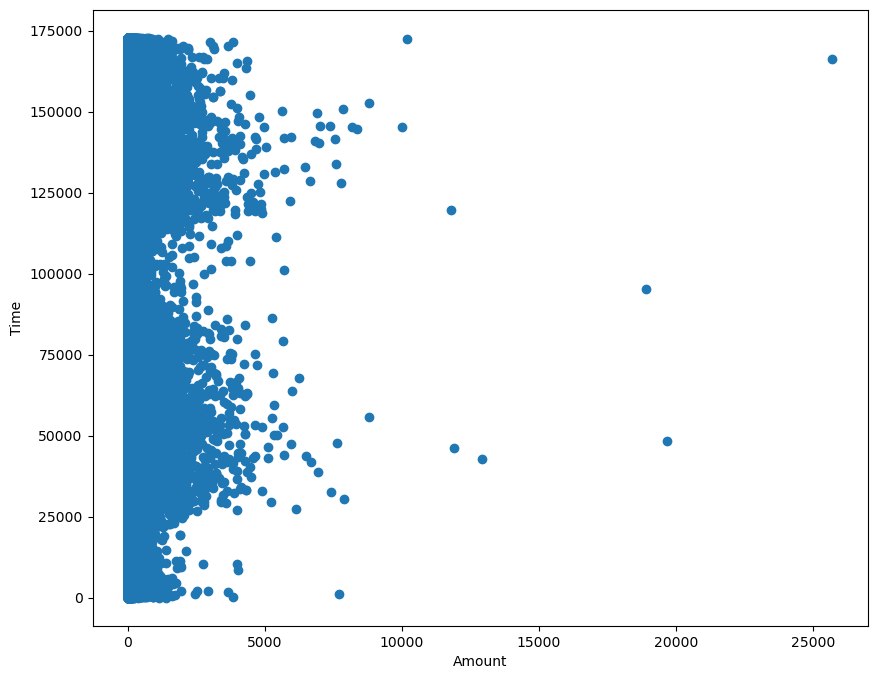

In [11]:
#outliers
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(cr_data['Amount'],cr_data['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

In [12]:
fraud=cr_data[cr_data.Class==1]
genuine=cr_data[cr_data.Class==0]
print(fraud.shape)
print(genuine.shape)

(492, 31)
(284315, 31)


In [13]:
#statistical measures
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

UNDERSAMPLING

In [15]:
#Building a sample dataset 
genuine_sample= genuine.sample(n=492)
new_d=pd.concat([genuine_sample,fraud],axis=0)
new_d.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1819,1411.0,-1.843151,1.695720,0.848633,-0.850290,-0.710714,-0.857539,0.156494,0.637991,0.549483,...,-0.220738,-0.451400,0.037456,0.495634,-0.098068,0.288296,0.581959,0.351278,1.00,0
79293,57955.0,1.376233,-0.424315,-0.136364,-0.638734,-0.654252,-1.012571,-0.075135,-0.361725,-1.122717,...,-0.440153,-0.830240,-0.031493,0.082244,0.372055,1.026729,-0.079068,0.004889,42.45,0
280560,169607.0,2.121139,-0.651675,-1.711398,-0.760176,0.058595,-0.371816,-0.157576,-0.172456,-1.057806,...,-0.488128,-1.031343,0.305826,0.237424,-0.306781,0.378458,-0.085622,-0.063618,40.00,0
73324,55084.0,-0.761895,0.485345,1.605893,-1.267070,-0.129290,-0.630666,0.511099,0.159084,0.163385,...,-0.043543,-0.183564,0.062358,0.082221,-0.441240,0.751354,0.252430,0.172467,34.60,0
240559,150656.0,-2.112150,-0.831450,0.624665,0.323561,4.155188,3.668802,-0.958640,0.942089,0.412733,...,-0.782413,-1.467195,-0.647267,0.708048,0.301758,-0.789816,0.308129,-0.194391,32.99,0


In [16]:
new_d.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_d['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
new_d.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94430.995935,0.061431,-0.085481,0.002805,-0.107885,-0.041151,-0.033292,0.080802,-0.010430,-0.022324,...,0.013709,0.065382,0.023437,0.022160,0.049986,0.010407,0.000681,-0.011989,0.014281,101.101809
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
#splitting the data
x=new_d.drop(['Class'],axis=1)
y=new_d['Class']
xtrain,xtest,ytrain ,ytest= train_test_split(x,y,test_size=0.2, random_state= 2)
print(x.shape, xtrain.shape, xtest.shape)

(984, 30) (787, 30) (197, 30)


In [22]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [23]:
y_pred = model.predict(xtest)
accuracy=model.score(xtest,ytest)
print(accuracy)

0.9441624365482234


In [24]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[91  4]
 [ 7 95]]


ACCURACY

In [25]:
print('Accuracy score of the Logistic Regression Model : ' , accuracy*100, '%')

Accuracy score of the Logistic Regression Model :  94.41624365482234 %
